<a href="https://colab.research.google.com/github/raulsomazabracho/Web-Scrapping/blob/main/Premier_League.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Traer info de goles de la pagina de la Premier League 
https://www.premierleague.com/stats/top/players/goals?se=418

# Importamos Librerias

In [ ]:
#Librerias usuales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Librerias para leer de la pagina web
from bs4 import BeautifulSoup
import requests
import re

# Conectamos con la página

In [ ]:
#Traemos el link
url = 'https://www.premierleague.com/stats/top/players/goals?se=418'

In [ ]:
#Accedemos a la pagina web
response = requests.get(url)
response

<Response [200]>

In [ ]:
#Creamos el objeto soup pasandole el contenido de respuesta de la pagina y el parser de html
soup = BeautifulSoup(response.content,'html.parser')

# Creamos las variables

In [ ]:
#Listas vacias para completar luego
nombre = []
equipo = []
nacionalidad = []
goles = []

# Extracción de la data

## Validación

Revisamos donde esta alojada la info que buscamos dentro de la pagina

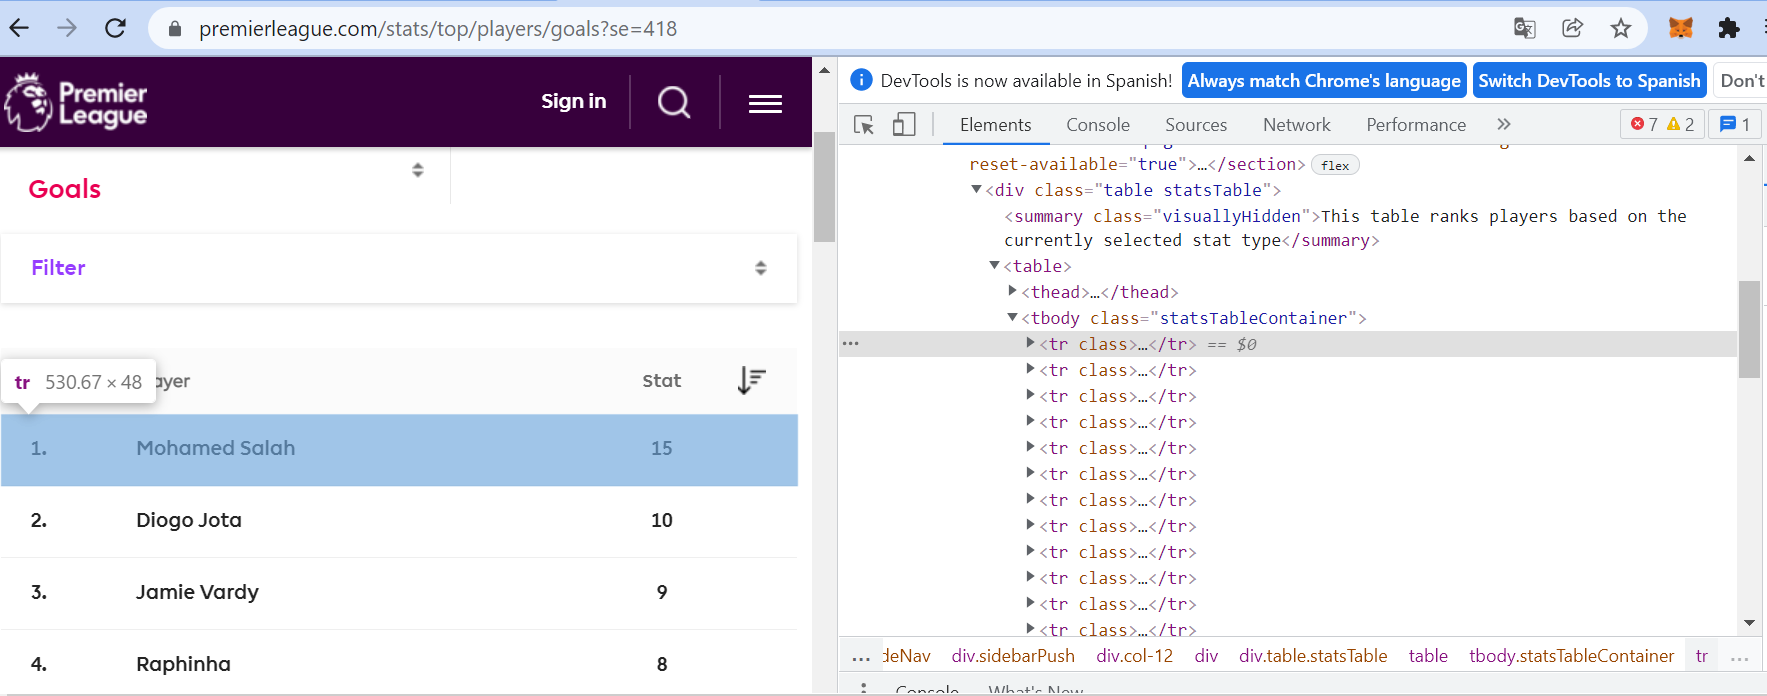

In [ ]:
info_jugadores = soup.findAll('tr', attrs = {'class':''})
info_jugadores

[<tr>
 <th class="rank" scope="col">Rank</th>
 <th scope="col">Player</th>
 <th class="hide-s" scope="col">Club</th>
 <th class="hide-s" scope="col">Nationality</th>
 <th class="mainStat text-centre" scope="col">Stat</th>
 <th class="order">
 <span class="reorderStatsButton">
 <span class="icn sort"></span>
 </span>
 </th>
 </tr>, <tr class="">
 <td class="rank"><strong>1</strong></td>
 <td scopr="row">
 <a class="playerName" href="/players/89/Alan-Shearer/overview">
 <strong>Alan Shearer</strong></a>
 </td>
 <td class="hide-s">
       -
     </td>
 <td class="hide-s">
 <div class="info">
 <span class="flag GB-ENG"></span>
 <span class="playerCountry">England</span>
 </div>
 </td>
 <td class="mainStat text-centre">260</td>
 <td> </td>
 </tr>, <tr class="">
 <td class="rank"><strong>2</strong></td>
 <td scopr="row">
 <a class="playerName" href="/players/2064/Wayne-Rooney/overview">
 <strong>Wayne Rooney</strong></a>
 </td>
 <td class="hide-s">
       -
     </td>
 <td class="hide-s">
 <

## Consolidación

In [ ]:
for jugador in info_jugadores:
  nombre_jugador= jugador.find('a', class_= 'playerName').text.replace('\n','') if jugador.find('a', class_= 'playerName') else '????'
  nombre.append(nombre_jugador)

  equipo_jugador = jugador.find('a',class_ = 'statNameSecondary').text.replace('\t','').replace('\n','').rstrip() if jugador.find('a',class_ = 'statNameSecondary') else '.'
  equipo.append(equipo_jugador)

  pais_jugador_2 = jugador.find_all('div', attrs={'class':'info'})

  pais_jugador = jugador.find('div', class_= 'info').text.replace('\t','').replace('\n','') if jugador.find('div', class_= 'info') else '.'
  nacionalidad.append(pais_jugador)

  goles_jugador = jugador.find('td',class_ = 'mainStat text-centre').text if jugador.find('td',class_ = 'mainStat text-centre') else '????'
  goles.append(goles_jugador)

# Creamos el DataFrame

In [ ]:
jugadores = pd.DataFrame({'Name':nombre,'Team':equipo,'Country':nacionalidad,'Goals':goles})
jugadores

,Name,Team,Country,Goals
0,????,.,.,????
1,Alan Shearer,.,England,260
2,Wayne Rooney,.,England,208
3,Andrew Cole,.,England,187
4,Sergio Agüero,.,Argentina,184
5,Frank Lampard,.,England,177
6,Thierry Henry,.,France,175
7,Harry Kane,Tottenham Hotspur,England,168
8,Robbie Fowler,.,England,163
9,Jermain Defoe,.,England,162
